In [1]:
import numpy as np
from matplotlib import pyplot as plt

from chain_variables import *

In [2]:
class Data(object):

    def __init__(self, statistic):
        self.statistic = statistic
        self.set_training_data()
        self.set_testing_data()
    
    def set_training_data(self):
        
        ### ID values (cosmo and hod numbers)
        fn_train = '../tables/id_pairs_train.txt'
        self.id_pairs_train = np.loadtxt(fn_train, delimiter=',', dtype=int)
        self.n_train = len(self.id_pairs_train)

        ### x values (data, cosmo and hod values)

        cosmos_train_fn = '../tables/cosmology_camb_full.dat'
        cosmos_train = np.loadtxt(cosmos_train_fn)
        n_cosmo_params = cosmos_train.shape[1]

        hods_train_fn = '../tables/HOD_design_np11_n5000_new_f_env.dat'
        hods_train = np.loadtxt(hods_train_fn)
        # Convert these columns (0: M_sat, 2: M_cut) to log to reduce range
        hods_train[:, 0] = np.log10(hods_train[:, 0])
        hods_train[:, 2] = np.log10(hods_train[:, 2])
        n_hod_params = hods_train.shape[1]

        self.n_params = n_cosmo_params + n_hod_params

        self.x_train = np.empty((self.n_train, self.n_params))
        for i in range(self.n_train):
            id_cosmo, id_hod = self.id_pairs_train[i]
            self.x_train[i,:] = np.concatenate((cosmos_train[id_cosmo], hods_train[id_hod]))

        ### y values (labels, value of statistics in each bin)

        self.n_bins = 9
        self.y_train = np.empty((self.n_train, self.n_bins))
        y_train_dir = '/home/users/ksf293/clust/results_aemulus_train'
        for i in range(self.n_train):
            id_cosmo, id_hod = self.id_pairs_train[i]
            y_train_fn = f'{y_train_dir}/results_{self.statistic}/{self.statistic}_cosmo_{id_cosmo}_HOD_{id_hod}_test_0.dat'
            r_vals, y = np.loadtxt(y_train_fn, delimiter=',', unpack=True)
            self.y_train[i,:] = y
        # all r_vals are the same so just save the last one
        self.r_vals = r_vals


    def set_testing_data(self):

        ### ID values (cosmo and hod numbers)
        fn_test = '../tables/id_pairs_test.txt'
        self.id_pairs_test = np.loadtxt(fn_test, delimiter=',', dtype=int)
        self.n_test = self.id_pairs_test.shape[0]

        ### x values (data, cosmo and hod values)

        cosmos_test_fn = '../tables/cosmology_camb_test_box_full.dat'
        cosmos_test = np.loadtxt(cosmos_test_fn)
        n_cosmo_params = cosmos_test.shape[1]

        hods_test_fn = '../tables/HOD_test_np11_n1000_new_f_env.dat'
        hods_test = np.loadtxt(hods_test_fn)
        # Convert these columns (0: M_sat, 2: M_cut) to log to reduce range
        hods_test[:, 0] = np.log10(hods_test[:, 0])
        hods_test[:, 2] = np.log10(hods_test[:, 2])
        n_hod_params = hods_test.shape[1]

        self.n_params = n_cosmo_params + n_hod_params

        self.x_test = np.empty((self.n_test, self.n_params))
        for i in range(self.n_test):
            id_cosmo, id_hod = self.id_pairs_test[i]
            self.x_test[i,:] = np.concatenate((cosmos_test[id_cosmo], hods_test[id_hod]))

        ### y values (labels, value of statistics in each bin)
        # Note: here we are using the mean of 5 boxes with the same parameters

        self.n_bins = 9
        self.y_test = np.empty((self.n_test, self.n_bins))
        y_test_dir = '/home/users/ksf293/clust/results_aemulus_test_mean'
        for i in range(self.n_test):
            id_cosmo, id_hod = self.id_pairs_test[i]
            y_test_fn = f'{y_test_dir}/results_{self.statistic}/{self.statistic}_cosmo_{id_cosmo}_HOD_{id_hod}_mean.dat'
            _, y = np.loadtxt(y_test_fn, delimiter=',', unpack=True)
            self.y_test[i,:] = y


In [27]:
def plot_test_models(statistic, test_id_pairs, colors):
    
    data = Data(statistic)
    
    plt.figure(figsize=(8,6))
    
    for j, ytr in enumerate(data.y_train):
        label = None
        if j==0:
            label = 'training data'
        plt.plot(data.r_vals, ytr, color='k', alpha=0.5, lw=0.2, label=label)
    
    fn_test = '../tables/id_pairs_test.txt'
    id_pairs_test = np.loadtxt(fn_test, delimiter=',', dtype=int)
    for i, test_id_pair in enumerate(test_id_pairs):
        idx_id = np.where(id_pairs_test == test_id_pair)[0][0]
        yt = data.y_test[idx_id]
        label = f'cosmo {test_id_pair[0]}, hod {test_id_pair[1]}'
        plt.plot(data.r_vals, yt, color=colors[i], alpha=1, lw=2, label=label)
    


    plt.xscale(scale_dict[statistic][0])
    plt.yscale(scale_dict[statistic][1])

    plt.xlabel(r_labels[statistic])
    plt.ylabel(stat_labels[statistic])
        
    plt.legend()

In [40]:
# test_id_pairs = [(1,1)]
# colors = ['cyan']
test_id_pairs = [(1,1), (2,0), (3,3), (4,4)]
colors = ['cyan', 'magenta', 'red', 'orange']

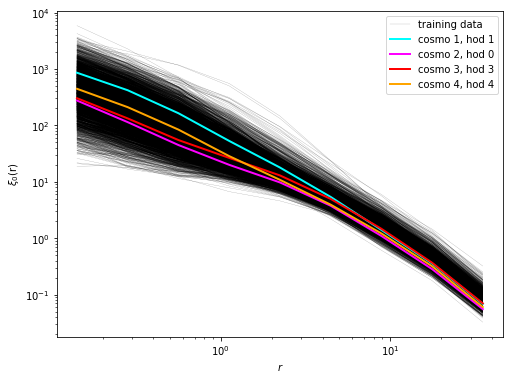

In [41]:
statistic = 'xi'
plot_test_models(statistic, test_id_pairs, colors)

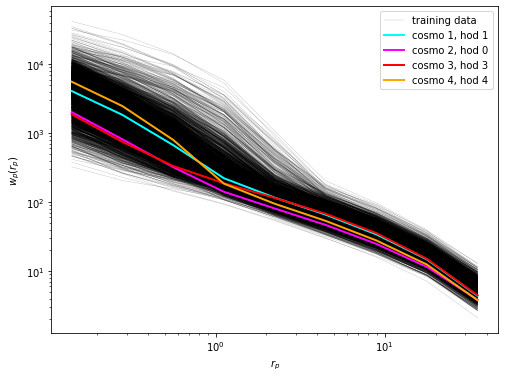

In [42]:
statistic = 'wp'
plot_test_models(statistic, test_id_pairs, colors)

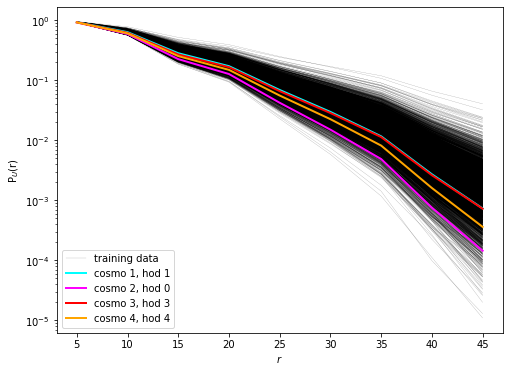

In [43]:
statistic = 'upf'
plot_test_models(statistic, test_id_pairs, colors)

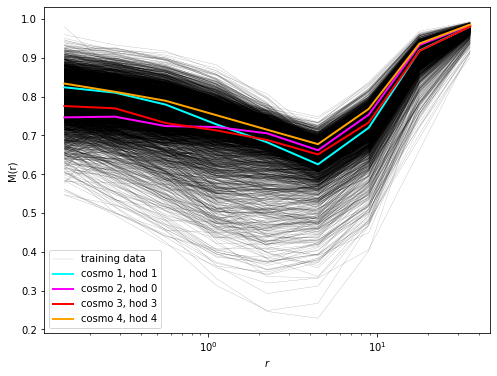

In [44]:
statistic = 'mcf'
plot_test_models(statistic, test_id_pairs, colors)